In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

import warnings
warnings.filterwarnings('ignore')

# Q5 Clustering
## 5.1 load dataset and draw scatter plot

In [38]:
df5 = pd.read_csv('mall_customers.csv')
df5.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


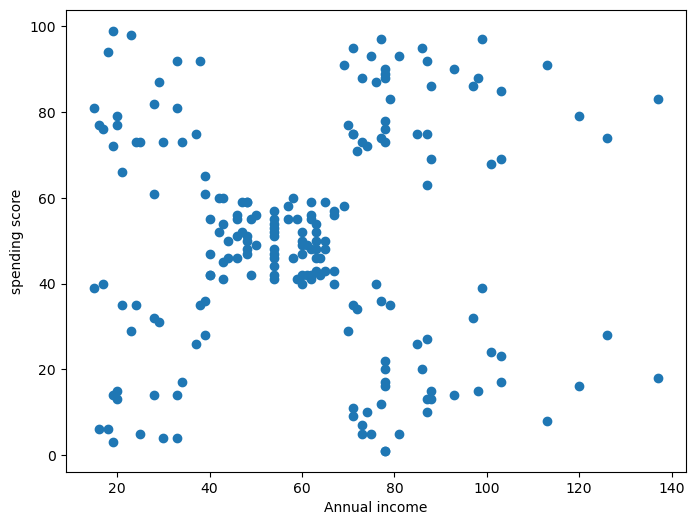

In [3]:
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(df5.iloc[:,0], df5.iloc[:,1]);
plt.xlabel('Annual income')
plt.ylabel('spending score');

## 5.2 K-means algorithm without sklearn

[[55 49]
 [25 20]
 [86 82]
 [88 17]
 [25 79]] 
 [1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 0 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


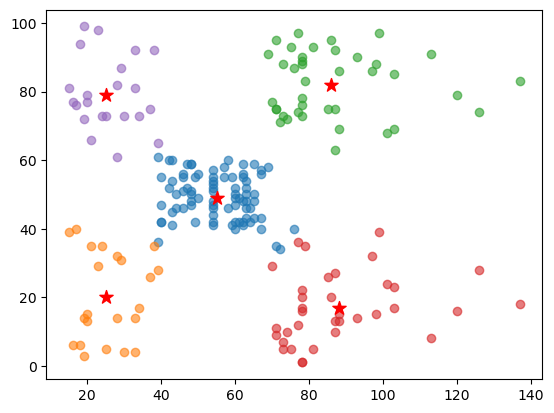

In [69]:
def EuclideanDistance(data, centers, k):
    '''''''''
    This function calculates the distance between each
    data point and each center, stores in a matrix with
    n rows (n data points) and k columns (k centers)
    '''''''''
    dis_mat = [[0]*k for i in range(data.shape[0])]
    for i in range(data.shape[0]):
        for j in range(k):
            dis_mat[i][j] = np.sqrt(np.sum((data.iloc[i,:]-centers[j])**2))
            
    return dis_mat


data = df5
epochs = 10
k = 5
rng = np.random.default_rng()
Cs = rng.choice(data, k)

for e in range(epochs):
    distance = EuclideanDistance(data=df5, centers=Cs, k=5)
    nearest_c = np.argmin(distance, axis=1)
    for new_c in range(k):
        Cs[new_c] = data.loc[nearest_c == new_c].mean()
        
for i in range(k):
    cluster = data.loc[nearest_c == i]
    X = cluster.iloc[:,0]
    y = cluster.iloc[:,1]
    plt.scatter(X, y, c=colors[i], alpha=0.6)
    
plt.scatter(Cs[:,0], Cs[:,1], s=100, marker='*',c='r');

print(Cs, '\n', nearest_c)

Each cluster represents:

the upper right cluster: people who have high income and also spend much   
the lower right cluster: people who have relatively low income but spend much    
the center cluster: people with medium income and medium spending score   
the upper left cluster: people with high income but low spending score   
the lower left cluster: people with low income and low spending score    

In [66]:
# print(Cs, '\n', nearest_c)
def PlotCluster(data, centers, nearest_c, k, colors):
    fig52, ax52 = plt.subplots(figsize=(8,6))
    plt.scatter(centers[:,0], centers[:,1], s=100, marker='*',c='r')
#     color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    for i in range(k):
        cluster = data.loc[nearest_c == i]
        X = cluster.iloc[:,0]
        y = cluster.iloc[:,1]
        plt.scatter(X, y, c=colors[i], alpha=0.6)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# PlotCluster(df5, Cs, nearest_c, 5, colors)

## 5.3 K-means with sklearn

In [8]:
from sklearn.cluster import KMeans

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]] 
 [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


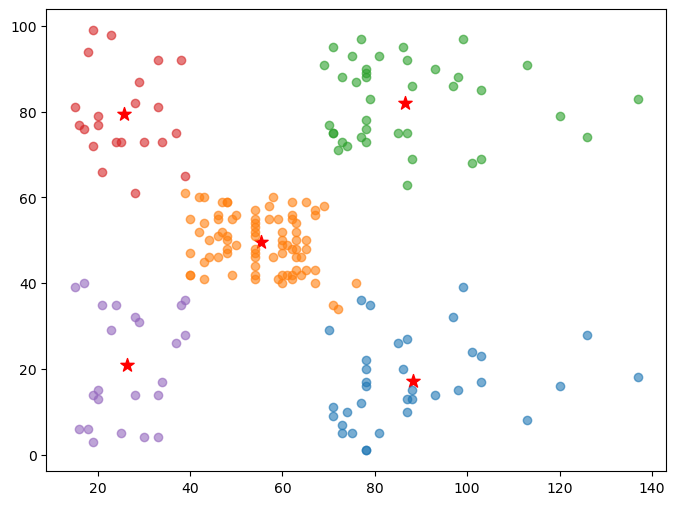

In [71]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df5)
centers_sk = kmeans.cluster_centers_
nearest_c_sk = kmeans.labels_
print(centers_sk, '\n', nearest_c_sk)
PlotCluster(df5, centers_sk, nearest_c_sk, 5, colors);


Yes, the results are the same for over 80% of the time. But Kmeans are more stable because the cluster assignment are always the same, but my algorithm has different labels for some iteration. This is probably because the initial centers of my algorithm are randomly chosen at the beginning, which may sometimes influence the final cluster result in the end.

## 5.4 K-medians

In [76]:
def l1normDistance(data, centers, k):
    '''''''''
    This function calculates the l1-norm distance between each
    data point and each center, stores in a matrix with
    n rows (n data points) and k columns (k centers)
    '''''''''
    dis_mat = [[0]*k for i in range(data.shape[0])]
    
    for i in range(data.shape[0]):
        for j in range(k):
            dis_mat[i][j] = np.sum(np.abs(data.iloc[i,:] - centers[j]))
            
    return dis_mat

[[79 83]
 [24 15]
 [54 50]
 [80 16]
 [24 77]] 
 [1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 2 4 2 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


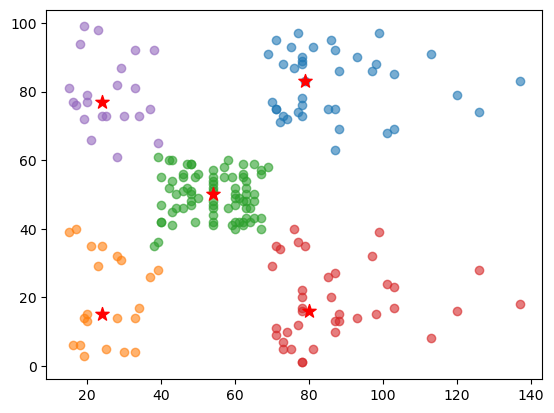

In [78]:
data = df5
epochs = 10
k = 5
rng = np.random.default_rng()
Cs = rng.choice(data, k)

for e in range(epochs):
    distance = l1normDistance(data=df5, centers=Cs, k=5)
    nearest_c = np.argmin(distance, axis=1)
    for new_c in range(k):
        Cs[new_c] = data.loc[nearest_c == new_c].median()
        
for i in range(k):
    cluster = data.loc[nearest_c == i]
    X = cluster.iloc[:,0]
    y = cluster.iloc[:,1]
    plt.scatter(X, y, c=colors[i], alpha=0.6)
    
plt.scatter(Cs[:,0], Cs[:,1], s=100, marker='*',c='r');

print(Cs, '\n', nearest_c)

The results are not the same when using k-means and k-medians.